# Ames Housing Project Suggestions

Data science is not a linear process. In this project, in particular, you will likely find that EDA, data cleaning, and exploratory visualizations will constantly feed back into each other. Here's an example:

1. During basic EDA, you identify many missing values in a column/feature.
2. You consult the data dictionary and use domain knowledge to decide _what_ is meant by this missing feature.
3. You impute a reasonable value for the missing value.
4. You plot the distribution of your feature.
5. You realize what you imputed has negatively impacted your data quality.
6. You cycle back, re-load your clean data, re-think your approach, and find a better solution.

Then you move on to your next feature. _There are dozens of features in this dataset._

Figuring out programmatically concise and repeatable ways to clean and explore your data will save you a lot of time.

The outline below does not necessarily cover every single thing that you will want to do in your project. You may choose to do some things in a slightly different order. Many students choose to work in a single notebook for this project. Others choose to separate sections out into separate notebooks. Check with your local instructor for their preference and further suggestions.


## Exploratory Visualizations
- Look at distributions.
- Look at correlations.
- Look at relationships to target (scatter plots for continuous, box plots for categorical).

## Inferential Visualizations
- Look at feature loadings.
- Look at how accurate your predictions are.
- Is there a pattern to your errors? Consider reworking your model to address this.

```
project-2
|__ code
|   |__ 01_EDA_and_Cleaning.ipynb   
|   |__ 02_Preprocessing_and_Feature_Engineering.ipynb   
|   |__ 03_Model_Benchmarks.ipynb
|   |__ 04_Model_Tuning.ipynb  
|   |__ 05_Production_Model_and_Insights.ipynb
|   |__ 06_Kaggle_Submissions.ipynb   
|__ data
|   |__ train.csv
|   |__ test.csv
|   |__ submission_lasso.csv
|   |__ submission_ridge.csv
|__ images
|   |__ coefficients.png
|   |__ neighborhoods.png
|   |__ predictions.png
|__ presentation.pdf
|__ README.md
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
    
%matplotlib inline

In [2]:
#Get datasets
train = ('../datasets/train_cleaned.csv')
test = ('../datasets/test_cleaned.csv')

In [3]:
test = pd.read_csv(test)
train = pd.read_csv(train)

In [4]:
#Annotate test and train sets
test['Is_test'] = 1
train['Is_test'] = 0
df = pd.concat([test,train],ignore_index=True,sort=False)
y = df['SalePrice']
df.drop('Unnamed: 0',axis = 1,inplace=True)

In [247]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Is_test,SalePrice
0,190,RM,69.0,9142,0,Grvl,3,Lvl,3,Inside,...,0,0,0,None,0,4,2006,WD,1,NaN
1,90,RL,0.0,9662,0,None,2,Lvl,3,Inside,...,0,0,0,None,0,8,2006,WD,1,NaN
2,60,RL,58.0,17104,0,None,2,Lvl,3,Inside,...,0,0,0,None,0,9,2006,New,1,NaN
3,30,RM,60.0,8520,0,None,3,Lvl,3,Inside,...,0,0,0,None,0,7,2007,WD,1,NaN
4,20,RL,0.0,9500,0,None,2,Lvl,3,Inside,...,0,0,0,None,0,7,2009,WD,1,NaN


In [220]:
# Subclass although in numbers, should be nominal
df['MS SubClass'] = df['MS SubClass'].astype(object)

In [237]:
# All nominal columns
nom_cols = df.columns[df.dtypes == 'object']
# All continuous columns
cont_cols = ['Lot Frontage','Lot Area','Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2',
           'Bsmt Unf SF','Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area','TotRms AbvGrd', 'Garage Area','Wood Deck SF',
           'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area','Misc Val']
# All ordinal columns
ordinal_cols = ['Street','Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond', 'Exter Qual','Exter Cond',
                'Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2',
                'Heating QC','Central Air','Electrical','Kitchen Qual','Functional','Fireplace Qu',
               'Garage Finish','Garage Qual','Garage Cond','Paved Drive','Pool QC','Fence']
# All discrete columns
dist_cols = ['Year Built','Year Remod/Add', 'Bsmt Full Bath','Bsmt Half Bath','Full Bath',
             'Half Bath','Bedroom','Kitchen''Fireplaces','Garage Yr Blt','Garage Cars',
            'Mo Sold','Yr Sold']

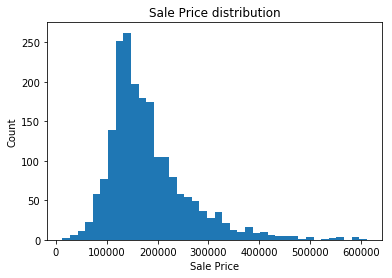

In [331]:
# Look at the distribution of sale prices
sns.distplot(
    df['SalePrice'], norm_hist=False, kde=False, bins=40, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count',title="Sale Price distribution");
plt.show()

## Target column distribution

In this distribution, we can see that the sale price is quite normally distributed, althought it is slightly skewed towards the left, as there are some outliers whose sale price is extremely high. Also from the distribution, the mean of sale price is between 150000, where the mode is around too. Most sale prices range between 100000 to 300000.

In [210]:
#Looking at scatterplots and checking for outliers:
def subplot_scatter(df,list_of_titles, list_of_xlabels):
    ncols = 3
    nrows = int(np.ceil(len(df.columns) / (1.0*ncols)))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 50))
    counter = 0
    for i in range(nrows):
        for j in range(ncols):
            ax = axes[i][j]  
            if counter < len(df.columns):      # Plot when we have data
                ax.scatter(df[df.columns[counter]], y)
                ax.set_xlabel(list_of_xlabels[counter])
                ax.set_title(list_of_titles[counter])
                ax.set_ylabel("Price")
        # Remove axis when we no longer have data
            else:
                ax.set_axis_off()

            counter += 1
    plt.tight_layout()
    plt.show()

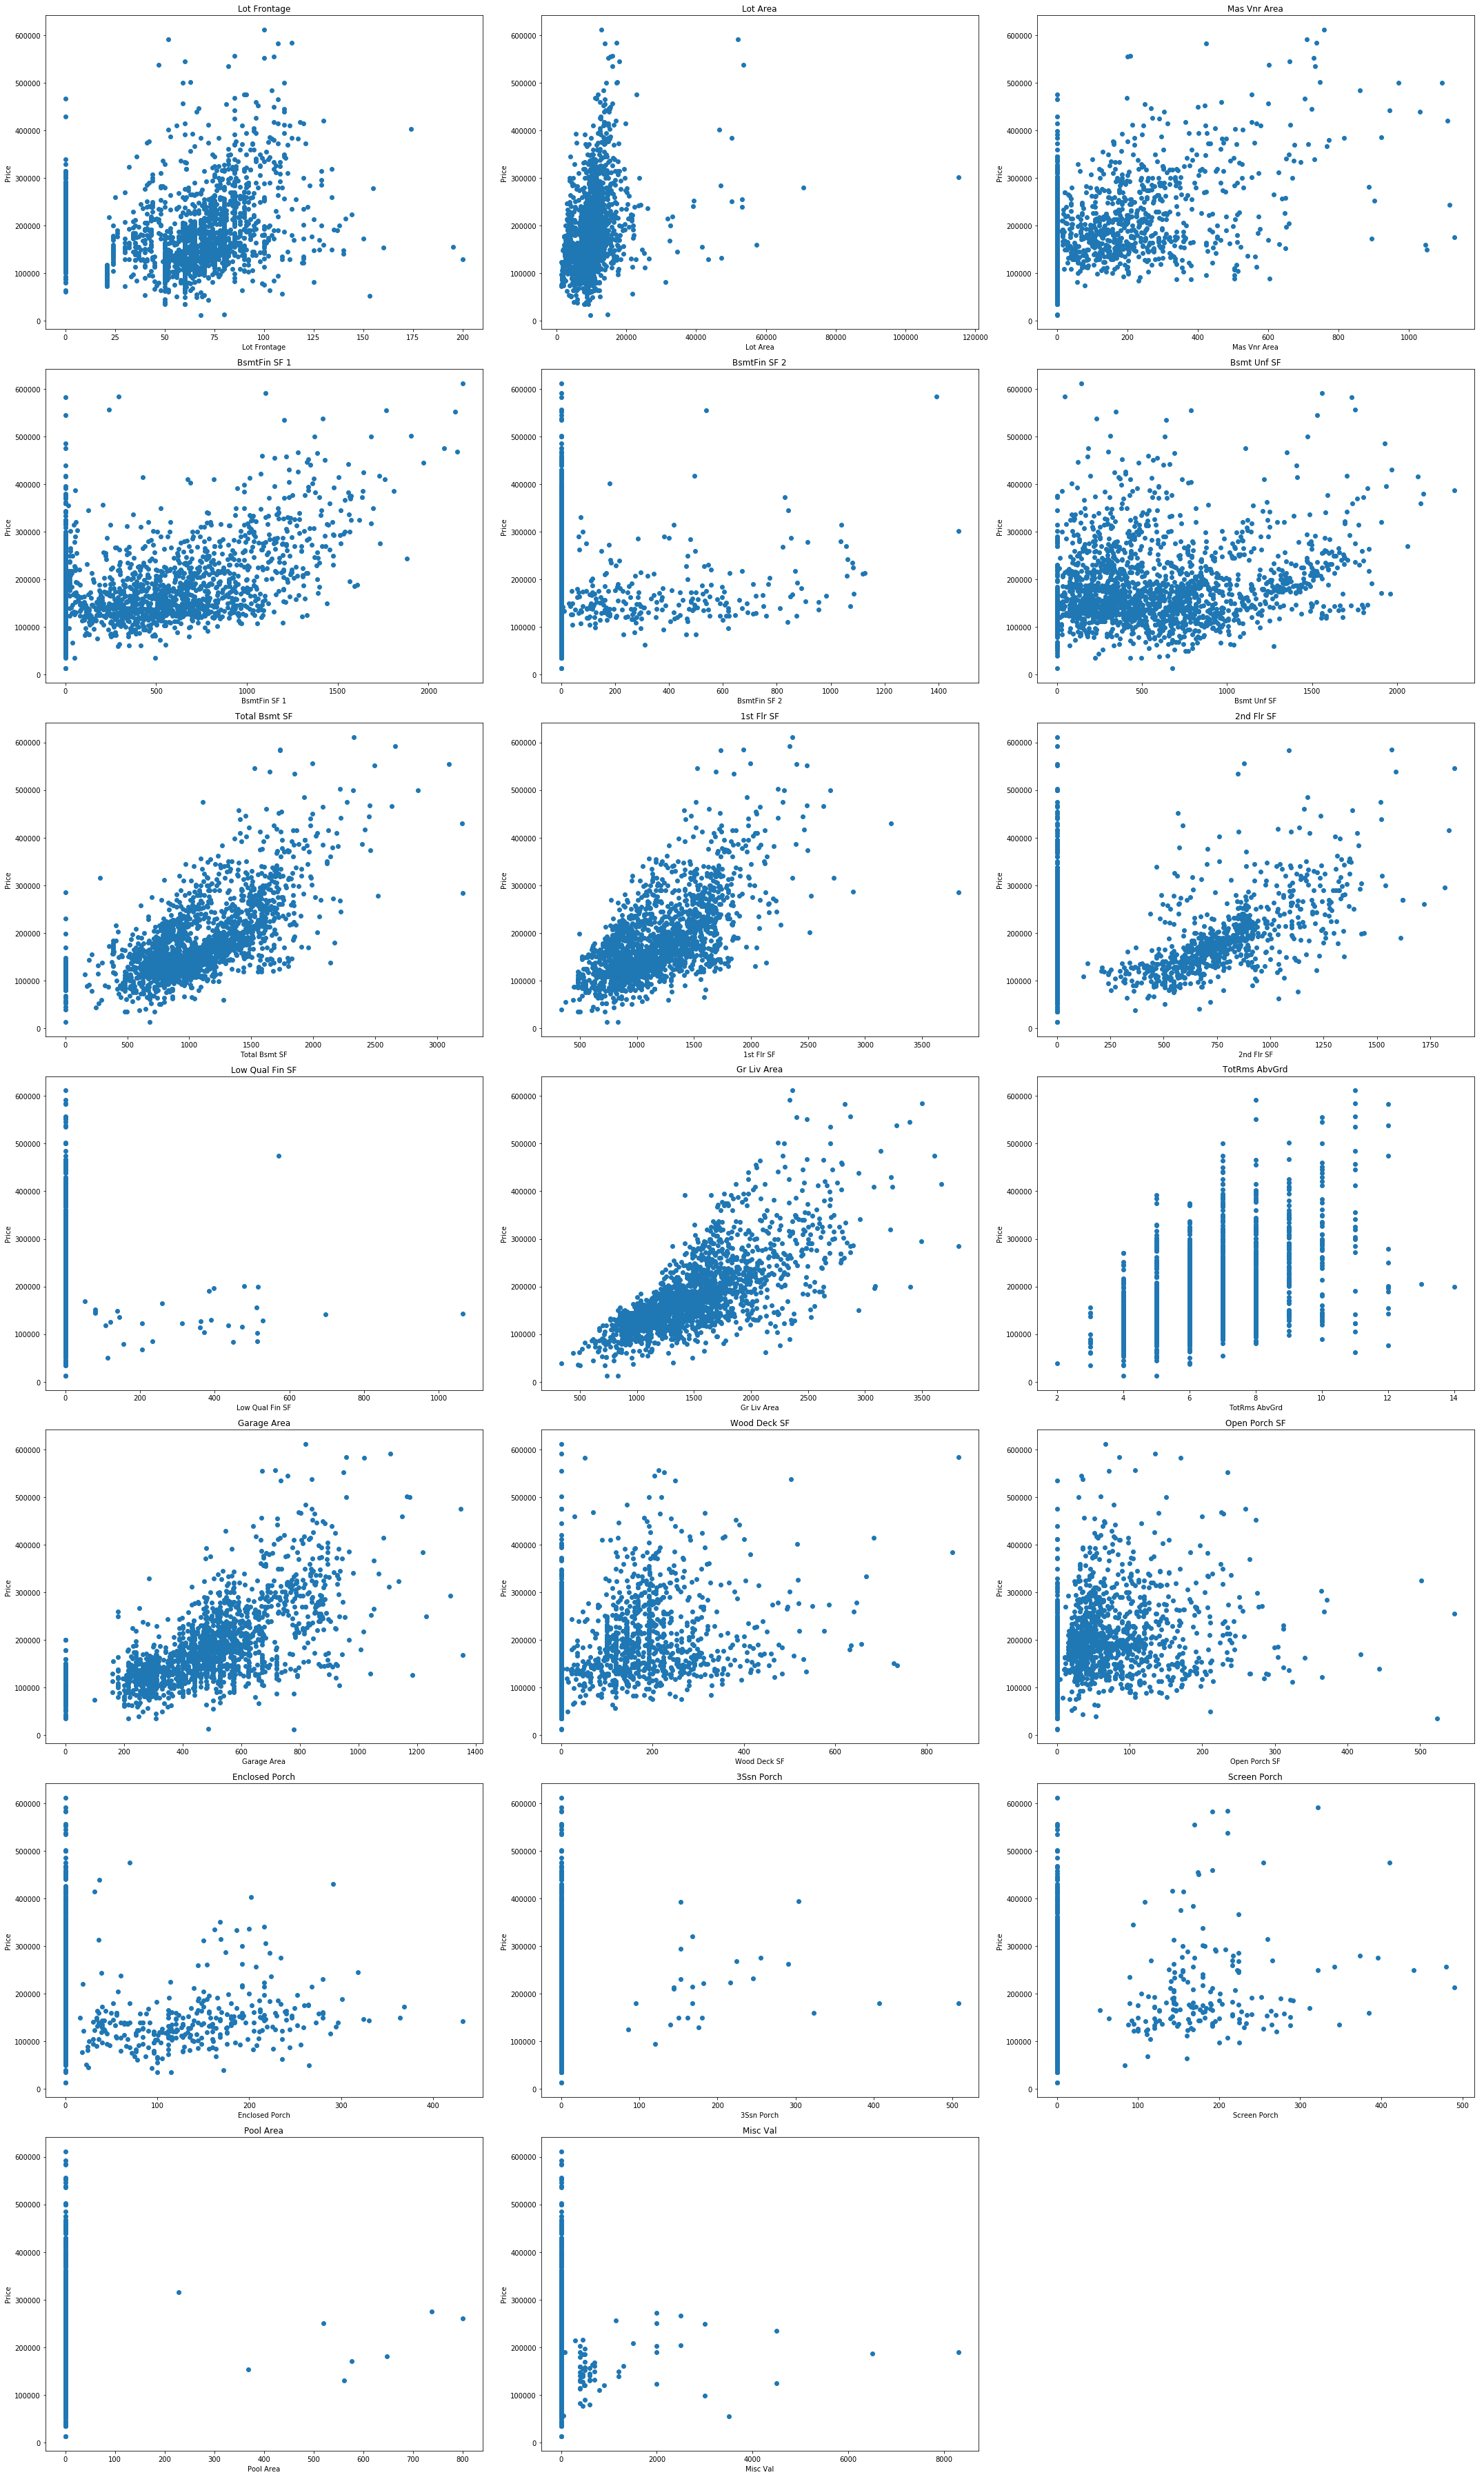

In [238]:
subplot_scatter(df[cont_cols],cont_cols,cont_cols)

## Distribution of continuous features against price
Most houses show a general positive trend, where when the feature size increase, so does the sale price. However, there are several scatterplots that show how the distributions were heavily skewed towards the lower end of the scale. For example, in the 'Pool Area' columns, we see that most houses do not possess a pool except a handful of a few houses (can be counted; 8). These features where the distribution is heavily skewed are as follows: Mas Vnr Area, Bsmtfin SF 1, Bsmtfin SF 2, 2nd Flr SF, Low Qual Fin SF, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area and Misc Val: In sum, a total of 12 columns.

As for the rest of the distributions, we can see that they generally follow a linear, if not slight exponential distribution against sale price. These features will be considered to possess a stronger relationship with the target column.<br>
1) 'Lot Frontage', <br>
2) 'Lot Area',<br>
3) 'Year Built',<br>
4) 'Year Remod/Add',<br>
5) 'Bsmt Unf SF',<br>
6) 'Total Bsmt SF',<br>
7) '1st Flr SF',<br>
8) 'Gr Liv Area',<br>
9) 'Garage Yr Blt',<br>
10) 'Garage Area'

In [242]:
# Holding list of features to be considered
features = ['Lot Frontage','Lot Area','Year Built','Year Remod/Add',
            'Bsmt Unf SF','Total Bsmt SF','1st Flr SF',
            'Gr Liv Area','Garage Yr Blt','Garage Area']

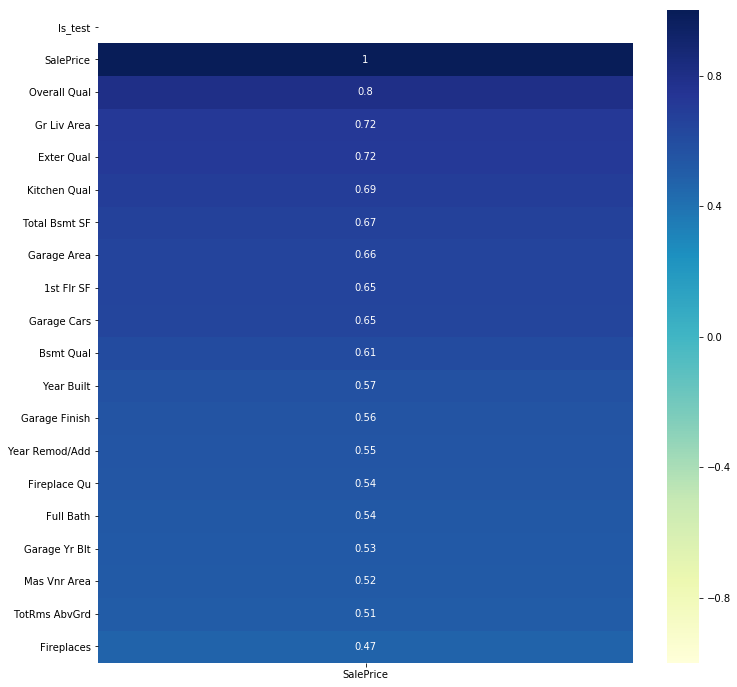

In [263]:
# Several features with top correlation with SalePrice
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr()[['SalePrice']].sort_values('SalePrice').tail(20),
            vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

In [286]:
to_remove = []
# List of features that are highly correlated with target; x > 0.7
to_remove.extend(('Overall Qual','Gr Liv Area','Exter Qual'))

In [192]:
# Look at high correlations
corr = df.corr().abs()
unstack_corr = corr.unstack()
corr_sort = unstack_corr.sort_values(ascending = False)

print(corr_sort[0:80])

MS SubClass     MS SubClass       1.000000
Garage Qual     Garage Cond       0.946088
Garage Cond     Garage Qual       0.946088
Garage Cars     Garage Area       0.892510
Garage Area     Garage Cars       0.892510
Pool QC         Pool Area         0.873444
Pool Area       Pool QC           0.873444
Fireplace Qu    Fireplaces        0.860961
Fireplaces      Fireplace Qu      0.860961
TotRms AbvGrd   Gr Liv Area       0.806678
Gr Liv Area     TotRms AbvGrd     0.806678
Overall Qual    SalePrice         0.803813
SalePrice       Overall Qual      0.803813
Year Built      Garage Yr Blt     0.799342
Garage Yr Blt   Year Built        0.799342
BsmtFin SF 2    BsmtFin Type 2    0.798789
BsmtFin Type 2  BsmtFin SF 2      0.798789
Total Bsmt SF   1st Flr SF        0.787990
1st Flr SF      Total Bsmt SF     0.787990
Exter Qual      Overall Qual      0.733494
dtype: float64


In [288]:
# List of features that are highly correlated with each other 0.8 < x , 1.0
# To remove based on lower variance
to_remove.extend(('Garage Cond','Garage Area','Pool Area','Fireplace Qu','Gr Liv Area','Overall Qual'))

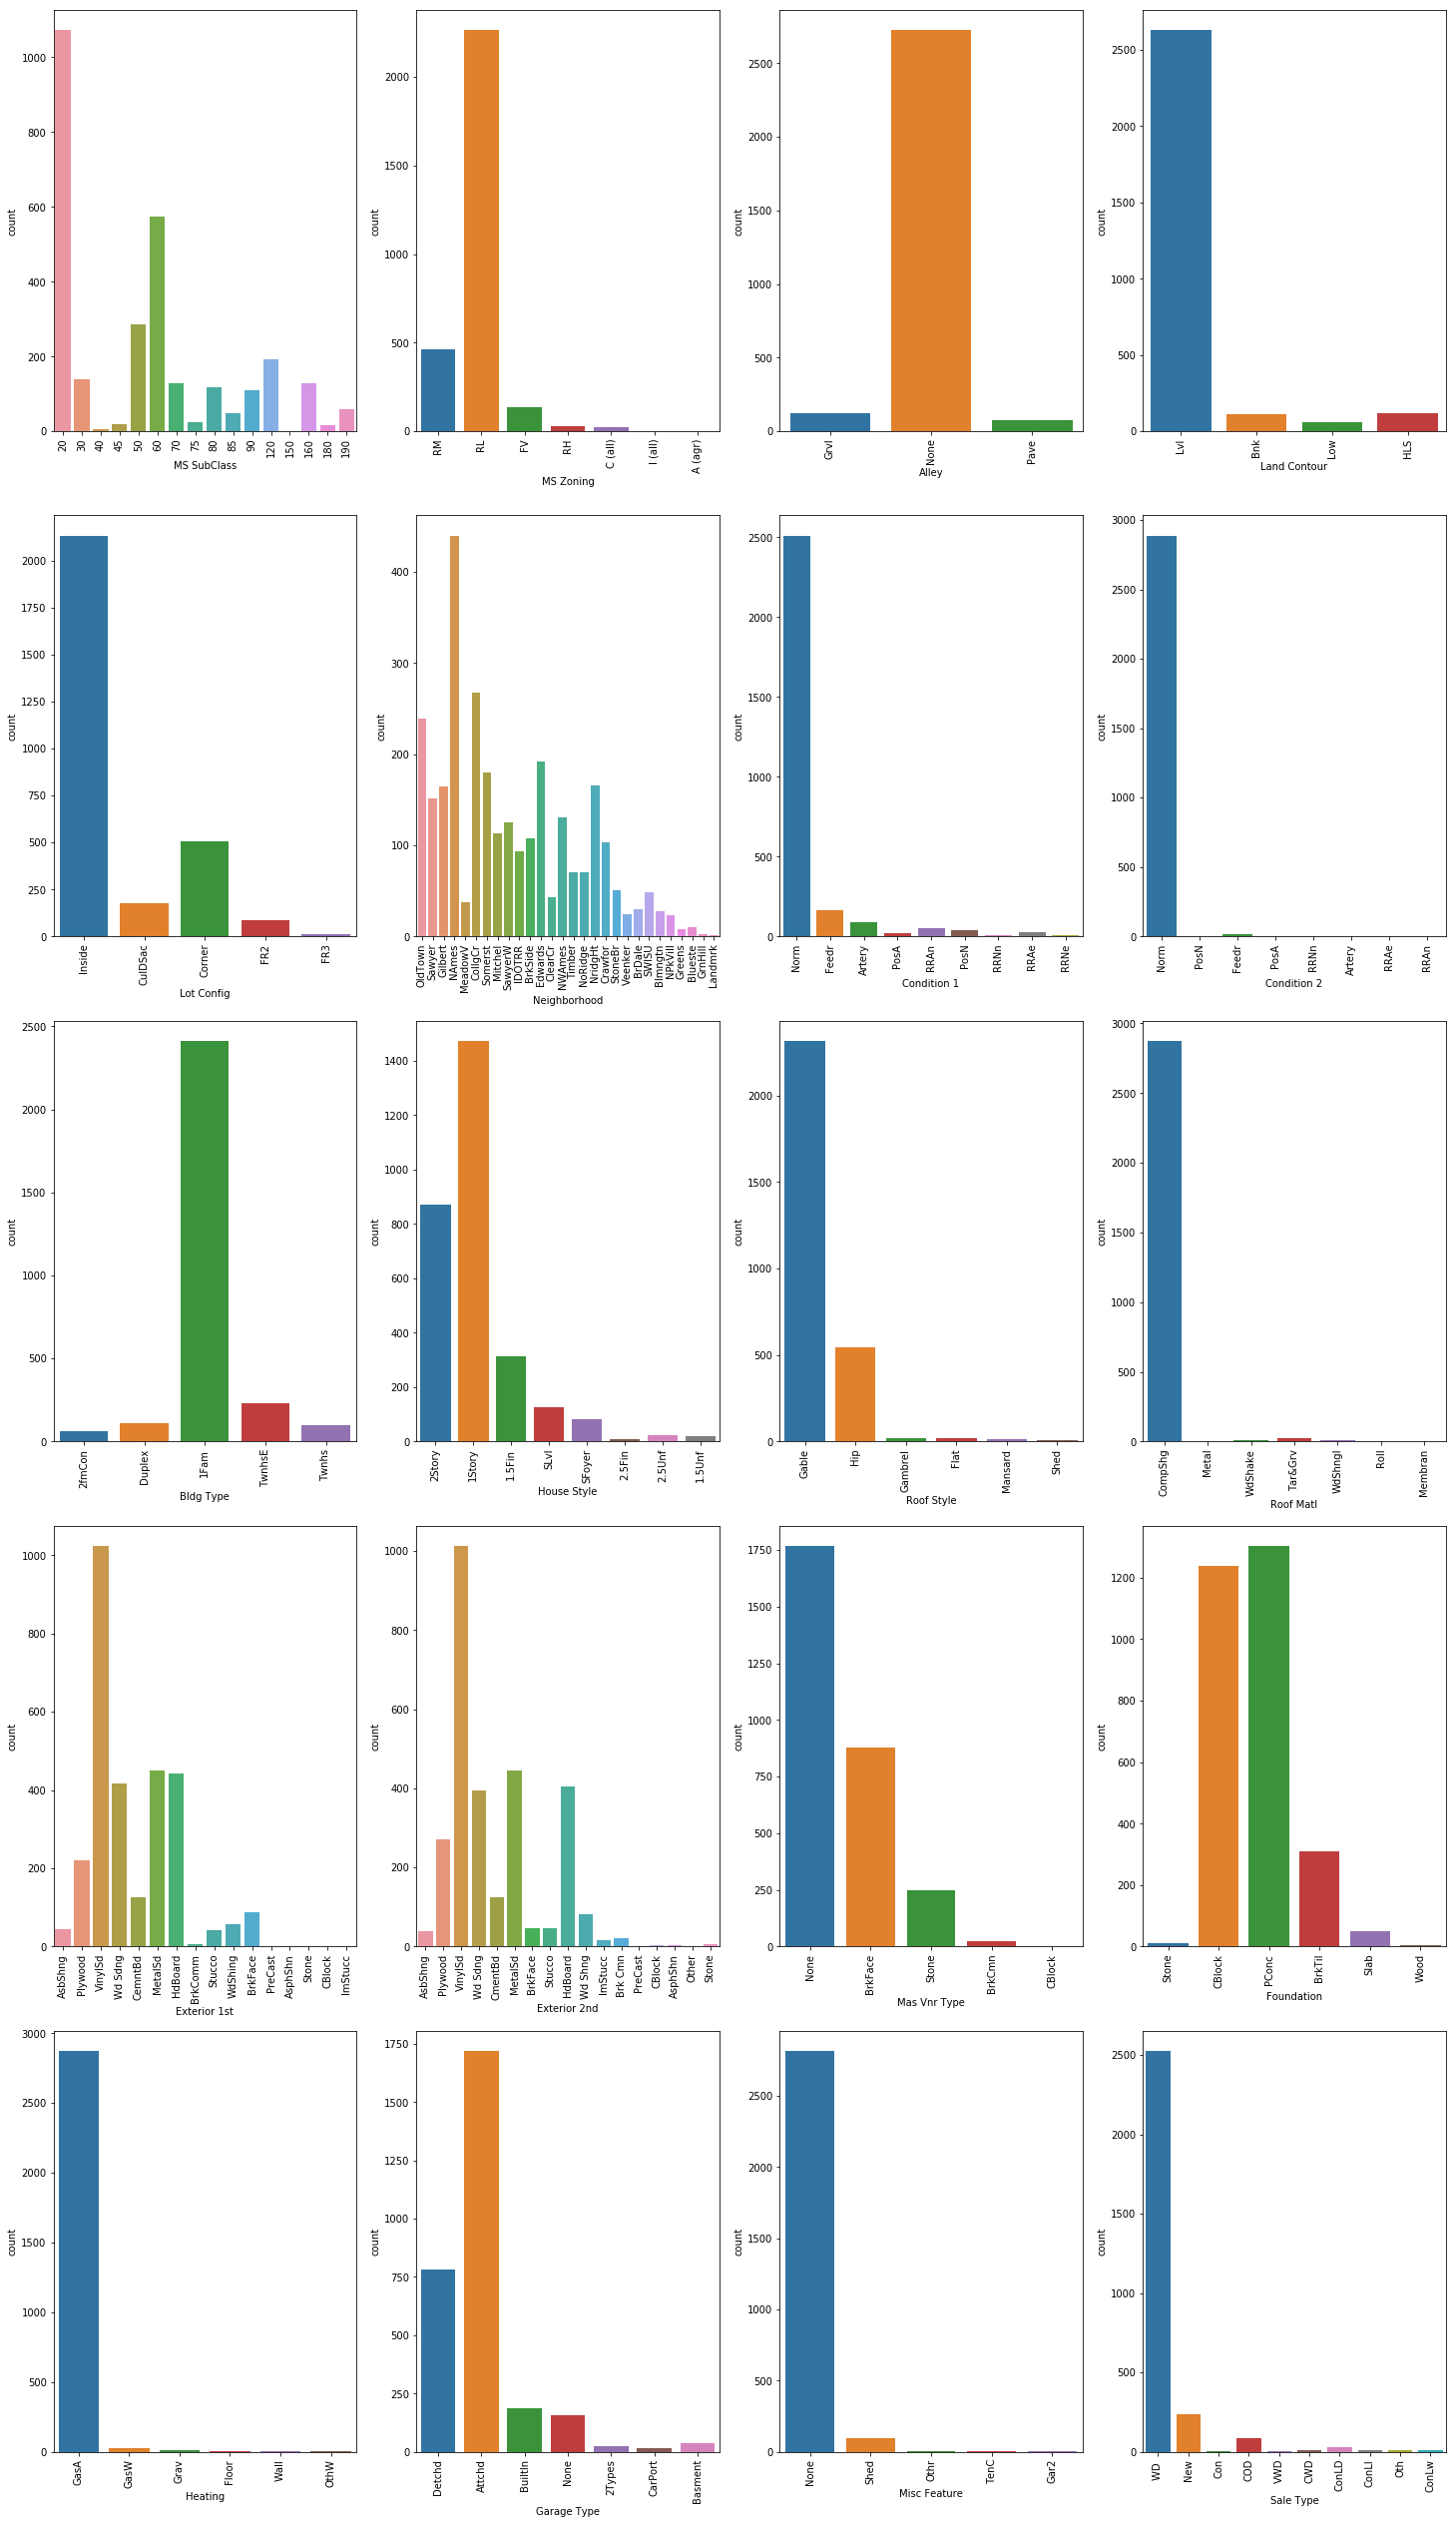

In [327]:
# Plotting the histograms for all norminal columns to see their count distribution
fig, ax = plt.subplots(5, 4, figsize=(25, 45))
for variable, subplot in zip(nom_cols, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

## Distribution of nominal columns in counts

As seen from the distributions above, most of the graphs are heavily skewed. There are categories which have high number of counts as opposed to the other categories in the same column. The lack of variance in theses nominal columns suggest that it is unlikely that these features will impact the target value of sales price. Thus, only categories with enough variance will be selected as features for the model. Furthermore, we can see from these distributions that the most houses sold neighbour hood is NAmes (North Ames), most houses have RL (Residential Low Density) zoning classification, have Regular lot shape, and also have CentralAir. 

Thus, we should include the following variables for constructing of the model:<br>
1) Garage Type <br>
2) Foundation <br>
3) Mas Vnr Type <br>
4) Exterior 2nd <br>
5) Exterior 1st <br>
6) Roof Style <br>
7) House style <br>
8) Bldg type <br>
9) Neighbourhood <br>
10) MS SubClass <br>
11) MS Zoning

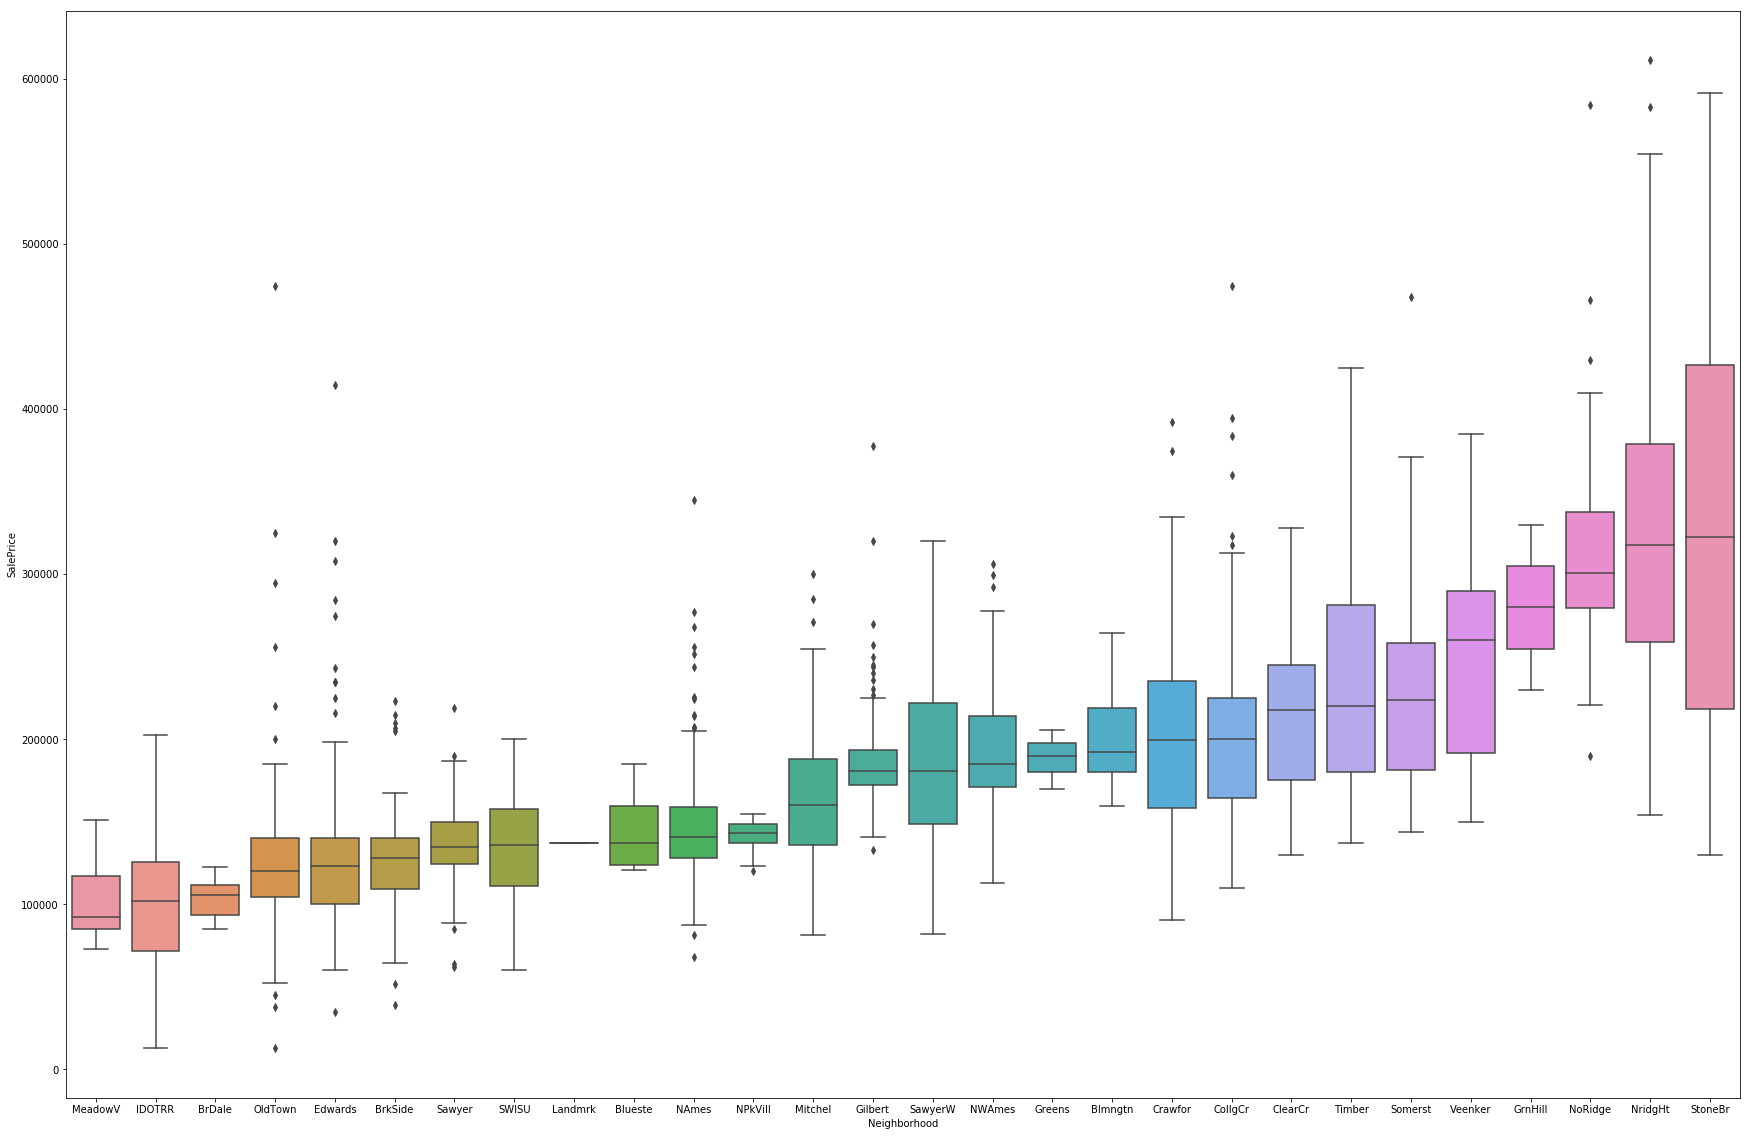

In [344]:
# Boxplot sorted
plt.figure(figsize=(30, 20))
sorted_nb = df.groupby(['Neighborhood'])['SalePrice'].median().sort_values()
sns.boxplot(x=df['Neighborhood'], y=df['SalePrice'], order=list(sorted_nb.index))
plt.show()

## Boxplot of neighbourhood against sale price
This figure gives us a lot of information. We can see that in the cheapest neighborhoods houses sell for a median price of around 100,000, and in the most expensive neighborhoods houses sell for around 300,000. We can also see that for some neighborhoods, dispersion between the prices is very low, meaning that all the prices are close to each other. In the most expensive neighborhood NridgHt, however, we see a large box — there is large dispersion in the distribution of prices.